### ✨ JPM Chase LCA applications for Q1 2024 ✨
**https://forager365.github.io/**

## Query using DuckDB

go to ***https://sql-workbench.com/***
for Q1 JPMChase data
```sql
select * from read_csv_auto('https://forager365.github.io/lca.csv')
where case_status = 'Certified'
and worksite_state = 'OH'
```
***LCA_Q1_Q2.parquet is the Q1 and Q2 dataset for all employers***
```sql
select * from 'https://forager365.github.io/LCA_Q1_Q2.parquet'
where employer_name ilike 'JPM%'
and case_status = 'Certified'
and worksite_city = 'Houston'
and job_title like '%Lead%'

In [19]:
import pandas as pd

In [33]:
df = pd.read_csv('LCA_Q1_Q2.csv', header=0, sep='|', quotechar='"', parse_dates = ["BEGIN_DATE","END_DATE"])

In [6]:
df.head()

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,JOB_TITLE,SOC_TITLE,BEGIN_DATE,END_DATE,TOTAL_WORKER_POSITIONS,EMPLOYER_NAME,EMPLOYER_ADDRESS1,...,WORKSITE_ADDRESS2,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY
0,I-200-19288-087953,Certified - Withdrawn,H-1B,BI Developer,"Software Developers, Applications",2019-10-15,2021-08-31,1,Stiaos Technologies,8900 Eastloch Dr.,...,620 Roseville Parkway,Roseville,PLACER,CA,95747,89814.0,89815.0,Year,89814.0,Year
1,I-200-19295-102430,Certified - Withdrawn,H-1B,Senior Tibco Developer,"Software Developers, Applications",2019-10-28,2021-02-28,1,Apex IT Services LLC,500 ALEXANDER PARK DR,...,NaN,Earth City,ST LOUIS,MO,63045,92820.0,NaN,Year,83346.0,Year
2,I-200-19296-103874,Certified - Withdrawn,H-1B,Java Backend Microservices Designer / Developer,"Software Developers, Applications",2019-10-23,2020-06-25,1,Stiaos Technologies,8900 Eastloch Dr.,...,Suite 210,Spring,HARRIS,TX,77379,91104.0,91105.0,Year,91104.0,Year
3,I-200-19297-106681,Certified - Withdrawn,H-1B,Research Scientist I,Biomedical Engineers,2019-10-24,2022-10-23,1,Georgia Institute of Technology,225 North Ave NW,...,NaN,Atlanta,FULTON,GA,30332,52100.0,NaN,Year,46821.0,Year
4,I-200-19297-106835,Certified - Withdrawn,H-1B,Software Engineer,"Software Developers, Applications",2019-10-24,2022-10-01,1,Stiaos Technologies,8900 Eastloch Dr.,...,700 Hidden Ridge,Irving,DALLAS,TX,75038,94307.0,94308.0,Year,94307.0,Year


In [7]:
df.dtypes

CASE_NUMBER                       object
CASE_STATUS                       object
VISA_CLASS                        object
JOB_TITLE                         object
SOC_TITLE                         object
BEGIN_DATE                datetime64[ns]
END_DATE                  datetime64[ns]
TOTAL_WORKER_POSITIONS             int64
EMPLOYER_NAME                     object
EMPLOYER_ADDRESS1                 object
EMPLOYER_CITY                     object
EMPLOYER_STATE                    object
EMPLOYER_POSTAL_CODE              object
NAICS_CODE                         int64
WORKSITE_ADDRESS1                 object
WORKSITE_ADDRESS2                 object
WORKSITE_CITY                     object
WORKSITE_COUNTY                   object
WORKSITE_STATE                    object
WORKSITE_POSTAL_CODE              object
WAGE_RATE_OF_PAY_FROM            float64
WAGE_RATE_OF_PAY_TO              float64
WAGE_UNIT_OF_PAY                  object
PREVAILING_WAGE                  float64
PW_UNIT_OF_PAY  

In [8]:
df.shape

(225917, 25)

In [9]:
df.info

<bound method DataFrame.info of                CASE_NUMBER            CASE_STATUS      VISA_CLASS  \
0       I-200-19288-087953  Certified - Withdrawn            H-1B   
1       I-200-19295-102430  Certified - Withdrawn            H-1B   
2       I-200-19296-103874  Certified - Withdrawn            H-1B   
3       I-200-19297-106681  Certified - Withdrawn            H-1B   
4       I-200-19297-106835  Certified - Withdrawn            H-1B   
...                    ...                    ...             ...   
225912  I-203-24085-827881                 Denied  E-3 Australian   
225913  I-203-24086-830388                 Denied  E-3 Australian   
225914  I-203-24087-832431                 Denied  E-3 Australian   
225915  I-203-24087-832836                 Denied  E-3 Australian   
225916  I-203-24089-840206              Withdrawn  E-3 Australian   

                                              JOB_TITLE  \
0                                          BI Developer   
1                    

In [10]:
df.EMPLOYER_NAME.unique()

array(['Stiaos Technologies ', 'Apex IT Services LLC',
       'Georgia Institute of Technology', ..., 'CrescoNet LLC',
       'Exa Labs, Inc.', 'Oakview Farm LLC'], dtype=object)

In [11]:
df["EMPLOYER_NAME"].drop_duplicates().sort_values(ascending=False)

87078      ¿Z. Wang & Associates, P.C.
7595                       ¿PGIM, Inc.
47589                     zulily, LLC.
22354             yes technologies llc
158431                   xprotean inc.
                      ...             
35292                Excellent IT Soft
41860                   AIWAYSION INC.
22791                    \tUxcel Inc. 
13019          \tNetspend Corporation 
17660     \tICON TECHNICAL GROUP, INC.
Name: EMPLOYER_NAME, Length: 34645, dtype: object

In [68]:
df.query('EMPLOYER_NAME.str.contains("JPMorgan|JP Morgan", case=False).values and CASE_STATUS == "Certified" and WORKSITE_CITY == "Columbus"',inplace=True) 

In [69]:
df[['JOB_TITLE','BEGIN_DATE','WORKSITE_CITY','TOTAL_WORKER_POSITIONS']].sort_values("BEGIN_DATE", ascending = True)

,JOB_TITLE,BEGIN_DATE,WORKSITE_CITY,TOTAL_WORKER_POSITIONS
19055,"Associate, Quant Analytics",2023-09-30,Columbus,1
13878,Lead Software Engineer,2023-10-02,Columbus,1
13911,"Associate, Software Engineer",2023-10-23,Columbus,1
27258,"Vice President, Lead Software Engineer",2023-10-30,Columbus,1
32774,"Vice President, Sr. Lead Software Engineer",2023-11-13,Columbus,1
...,...,...,...,...
204311,"Vice President, Analytics Solutions Manager",2024-09-06,Columbus,1
203646,"Vice President, Product Delivery Manager",2024-09-06,Columbus,1
207784,"Vice President, Lead Software Engineer",2024-09-07,Columbus,1
198682,"Associate, Software Engineer III",2024-09-10,Columbus,1


In [53]:
df[['JOB_TITLE','BEGIN_DATE','WORKSITE_CITY','TOTAL_WORKER_POSITIONS']].sort_values("BEGIN_DATE", ascending = True).groupby("WORKSITE_CITY").size()

WORKSITE_CITY
Columbus    138
dtype: int64

In [10]:
%pip install -q nbformat plotly

In [11]:
import plotly.express as px

In [59]:
df[['JOB_TITLE','BEGIN_DATE','WORKSITE_CITY','TOTAL_WORKER_POSITIONS']].sort_values("BEGIN_DATE", ascending = True)

,JOB_TITLE,BEGIN_DATE,WORKSITE_CITY,TOTAL_WORKER_POSITIONS
29,"Associate, Quant Analytics",2023-09-30,Columbus,1
2,Lead Software Engineer,2023-10-02,Columbus,1
3,"Associate, Software Engineer",2023-10-23,Columbus,1
48,"Vice President, Lead Software Engineer",2023-10-30,Columbus,1
78,"Vice President, Sr. Lead Software Engineer",2023-11-13,Columbus,1
...,...,...,...,...
960,"Vice President, Analytics Solutions Manager",2024-09-06,Columbus,1
949,"Vice President, Product Delivery Manager",2024-09-06,Columbus,1
985,"Vice President, Lead Software Engineer",2024-09-07,Columbus,1
921,"Associate, Software Engineer III",2024-09-10,Columbus,1


In [34]:
df.query('EMPLOYER_NAME.str.contains("JPMorgan|JP Morgan", case=False).values and CASE_STATUS == "Certified" ',inplace=True)
fig = px.bar(df, x='WORKSITE_CITY', y='TOTAL_WORKER_POSITIONS')

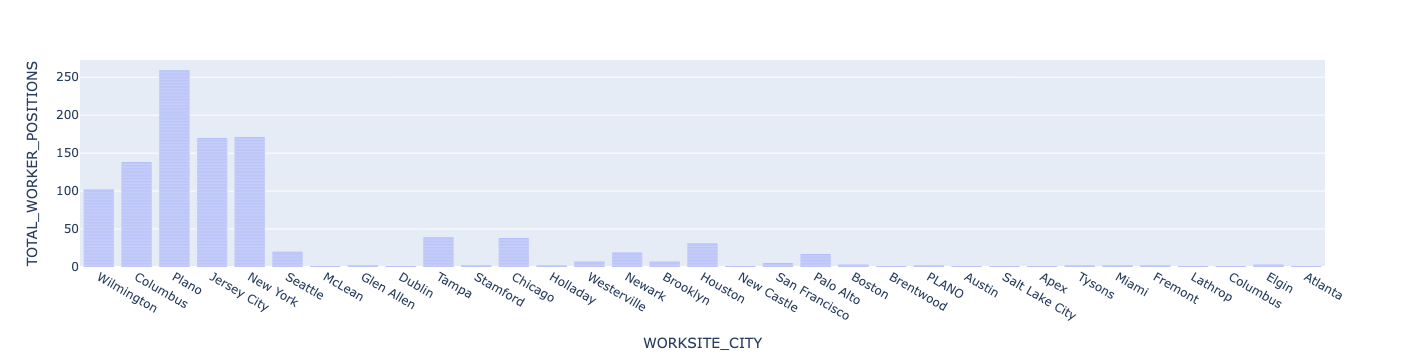

In [35]:
fig.show()

In [37]:
df.query('EMPLOYER_NAME.str.contains("JPMorgan|JP Morgan", case=False).values and CASE_STATUS == "Certified" ',inplace=True)
df = df.groupby(['WORKSITE_STATE'])['TOTAL_WORKER_POSITIONS'].agg('sum').reset_index(name ='TOTAL POSITIONS').sort_values(by = ['TOTAL POSITIONS'], ascending=[False])


In [38]:
fig = px.bar(df, x='WORKSITE_STATE', y='TOTAL POSITIONS')

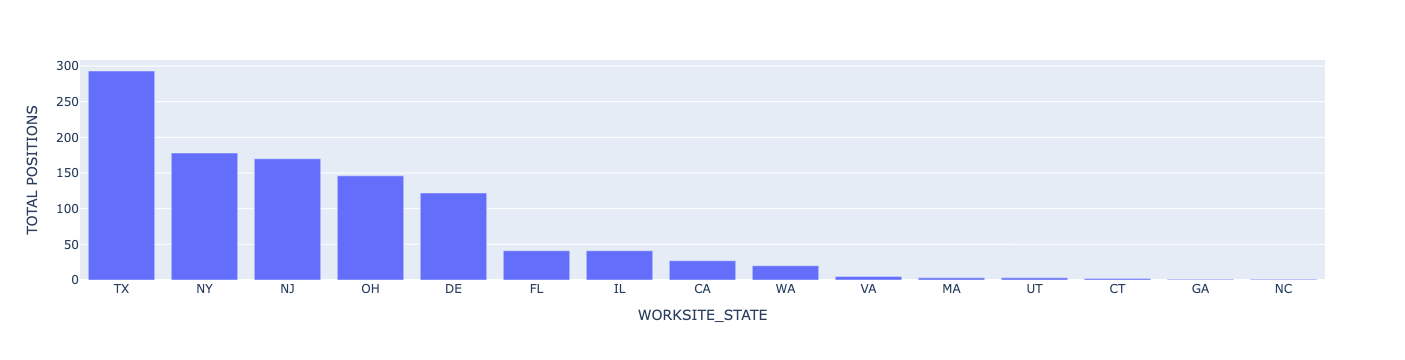

In [39]:
fig.show()